In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_auc_score, recall_score

In [28]:
! head -n 5 retail_loans.csv

In [29]:
data = pd.read_csv("retail_loans.csv")
data.head()

,loan_applicant_id,age,education,years_with_current_employer,years_at_current_address,household_income,debt_to_income_ratio,credit_card_debt,other_debt,y
0,191,44,university.degree,10,20,192,12.116645,14.377313,8.886645,1
1,34318,34,high.school,3,18,57,14.264229,5.137880,2.992730,0
2,14932,45,university.degree,14,24,212,7.285681,10.460306,4.985339,0
3,2776,33,illiterate,12,5,418,11.386272,3.040189,44.554429,1
4,11915,20,basic,4,19,122,28.418494,14.560450,20.110112,0


- loan_applicant_id: A unique identifier for each loan applicant.
- age: The age of the loan applicant.
- education: The education level of the loan applicant.
- years_with_current_employer: How many years the applicant has been with their current employer.
- years_at_current_address: How many years the applicant has lived at their current address.
- household_income: The applicant's household income.
- debt_to_income_ratio: The applicant's debt-to-income ratio.
- credit_card_debt: The amount of the applicant's credit card debt.
- other_debt: The amount of the applicant's other debts.
- y: The target variable, indicating whether the applicant defaulted (1) or not (0).

In [30]:
data.describe()

,loan_applicant_id,age,years_with_current_employer,years_at_current_address,household_income,debt_to_income_ratio,credit_card_debt,other_debt,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,20594.50000,38.007842,13.549869,15.385331,139.707366,16.224054,9.577260,13.758168,0.112654
std,11890.09578,10.623627,8.145105,9.184471,81.688037,9.191426,12.408628,14.596510,0.316173
min,1.00000,20.000000,0.000000,0.000000,14.000000,0.400386,0.005668,0.021759,0.000000
25%,10297.75000,29.000000,6.000000,7.000000,74.000000,8.452497,1.853292,3.783906,0.000000
50%,20594.50000,38.000000,14.000000,15.000000,134.000000,16.105334,5.311447,9.153871,0.000000
75%,30891.25000,47.000000,21.000000,23.000000,196.000000,23.730786,12.636789,18.906855,0.000000
max,41188.00000,56.000000,29.000000,31.000000,446.000000,41.293984,149.015859,159.198221,1.000000


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   loan_applicant_id            41188 non-null  int64  
 1   age                          41188 non-null  int64  
 2   education                    41188 non-null  object 
 3   years_with_current_employer  41188 non-null  int64  
 4   years_at_current_address     41188 non-null  int64  
 5   household_income             41188 non-null  int64  
 6   debt_to_income_ratio         41188 non-null  float64
 7   credit_card_debt             41188 non-null  float64
 8   other_debt                   41188 non-null  float64
 9   y                            41188 non-null  int64  
dtypes: float64(3), int64(6), object(1)
memory usage: 3.1+ MB


In [32]:
data.isna().sum()

loan_applicant_id              0
age                            0
education                      0
years_with_current_employer    0
years_at_current_address       0
household_income               0
debt_to_income_ratio           0
credit_card_debt               0
other_debt                     0
y                              0
dtype: int64

# Exploratory Data Analysis

In [33]:
data['y'].value_counts(normalize=True)

0    0.887346
1    0.112654
Name: y, dtype: float64

<Axes: >

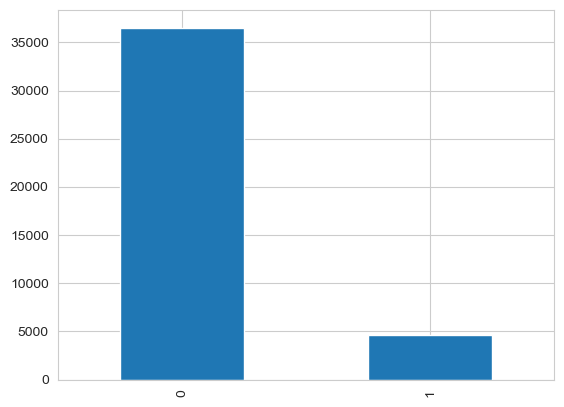

In [34]:
data['y'].value_counts().plot(kind='bar')

## Data Visualization: Distributions and Relationships

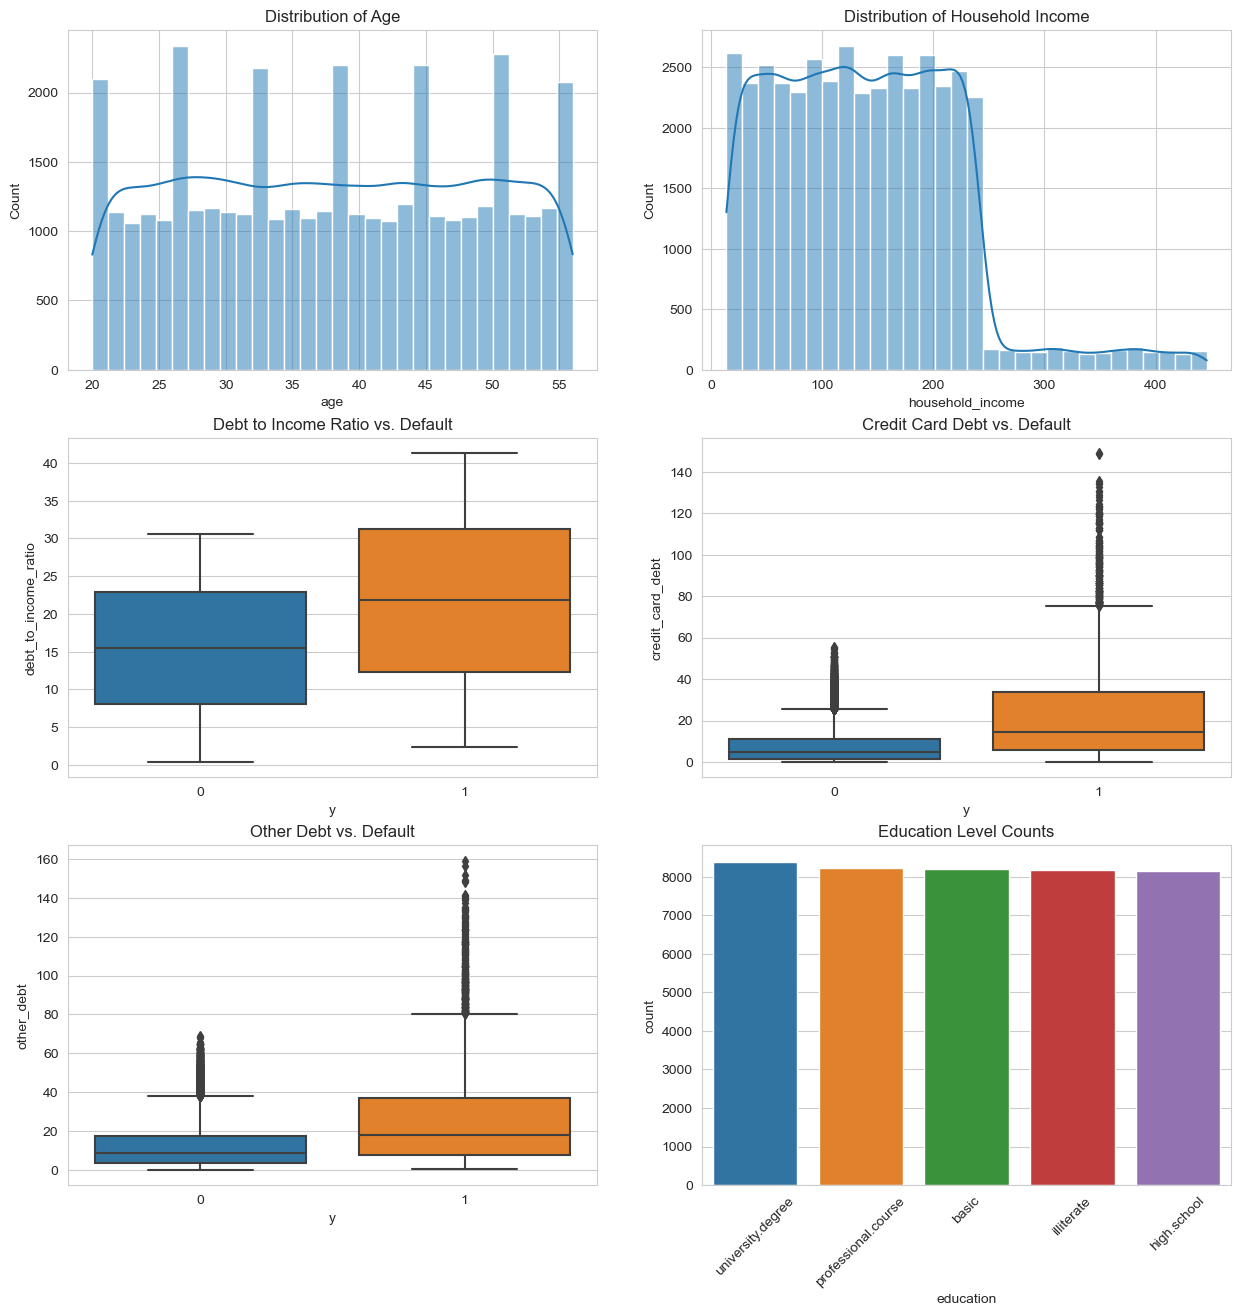

In [35]:
sns.set_style('whitegrid')
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

# Distribution of Age
sns.histplot(data=data, x='age', bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Age')

# Distribution of Household Income
sns.histplot(data=data, x='household_income', bins=30, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Household Income')

# Debt to Income Ratio vs. Default
sns.boxplot(data=data, x='y', y='debt_to_income_ratio', ax=axes[1, 0])
axes[1, 0].set_title('Debt to Income Ratio vs. Default')

# Credit Card Debt vs. Default
sns.boxplot(data=data, x='y', y='credit_card_debt', ax=axes[1, 1])
axes[1, 1].set_title('Credit Card Debt vs. Default')

# Other Debt vs. Default
sns.boxplot(data=data, x='y', y='other_debt', ax=axes[2, 0])
axes[2, 0].set_title('Other Debt vs. Default')

# Education Level Counts
sns.countplot(data=data, x='education', ax=axes[2, 1], order=data['education'].value_counts().index)
axes[2, 1].set_title('Education Level Counts')
axes[2, 1].tick_params(axis='x', rotation=45)

plt.show()

In [36]:
# data = pd.get_dummies(data, columns=['education']).drop('loan_applicant_id', axis=1)

# Feature Engineering and Pipeline

In [37]:
# Feature Engineering
categorical_features = ['education']
numerical_features = ['age', 'years_with_current_employer', 'years_at_current_address', 'household_income', 'debt_to_income_ratio', 'credit_card_debt', 'other_debt']

# Pipeline for numerical features
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Pipeline for categorical features
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine pipelines into a single preprocessor
preprocessor = ColumnTransformer(
        transformers=[
            ('num', num_pipeline, numerical_features),
            ('cat', cat_pipeline, categorical_features)
        ]
)

# Split data

In [39]:
X = data.drop('y', axis=1)
y = data['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Get view of the transformed traing data.

In [40]:
pd.DataFrame(preprocessor.fit_transform(X_train), columns=preprocessor.get_feature_names_out()).head()

,num__age,num__years_with_current_employer,num__years_at_current_address,num__household_income,num__debt_to_income_ratio,num__credit_card_debt,num__other_debt,cat__education_basic,cat__education_high.school,cat__education_illiterate,cat__education_professional.course,cat__education_university.degree
0,-0.754111,-1.663237,0.394861,0.246502,-0.640742,-0.753524,0.169256,0.0,0.0,0.0,0.0,1.0
1,-1.319146,-1.663237,-1.239912,1.008339,-0.674405,-0.740939,0.549315,0.0,0.0,0.0,0.0,1.0
2,0.281787,-1.295124,1.484710,0.479968,1.554284,1.112121,1.190777,1.0,0.0,0.0,0.0,0.0
3,-0.094903,-1.172419,-0.368033,1.118929,1.139912,2.255132,0.702834,0.0,0.0,0.0,1.0,0.0
4,-0.000730,-1.172419,0.067907,-0.048403,-0.356678,-0.057138,-0.348717,0.0,0.0,0.0,1.0,0.0


Our processing pipeline functions well, we can now build and train the logistic regression model.

In [41]:
clf_reg = make_pipeline(preprocessor, LogisticRegression())
clf_reg.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age',
                                                   'years_with_current_employer',
                                                   'years_at_current_address',
                                                   'household_income',
                                                   'debt_to_income_ratio',
                                                   'credit_card_debt',
                                                   'other_debt']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['education'])])),
                ('logisticregression', LogisticRegression())])

# Evaluate the model on both training data and validation data

In [42]:
def get_metrics(model, y_pred):
    '''
    output a dictionary containing the model's performance metrics
    on the entire training set and of a 5-fold cross-validation
    by inputting the model and the predicted labels on the train dataset
    '''
    metrics = {
        'accuracy_train' : accuracy_score(y_train, y_pred),
        'accuracy_valid' : cross_val_score(model, X_train, y_train, cv=5, n_jobs=-1, scoring='accuracy').mean(),
        'precision_train' : precision_score(y_train, y_pred),
        'precision_valid' : cross_val_score(model, X_train, y_train, cv=5, n_jobs=-1, scoring='precision').mean(),
        'recall_train' : recall_score(y_train, y_pred),
        'recall_valid' : cross_val_score(model, X_train, y_train, cv=5, n_jobs=-1, scoring='recall').mean(),
        'f1_train' : f1_score(y_train, y_pred),
        'f1_valid' : cross_val_score(model, X_train, y_train, cv=5, n_jobs=-1, scoring='f1').mean(),
        'auc_train': roc_auc_score(y_train, y_pred),
        'auc_valid': cross_val_score(model, X_train, y_train, cv=5, n_jobs=-1, scoring='roc_auc').mean(),
    }
    
    return metrics

In [44]:
y_pred = clf_reg.predict(X_train)

In [47]:
get_metrics(clf_reg, y_pred)

{'accuracy_train': 0.9249864105816271,
 'accuracy_valid': 0.9248414567856494,
 'precision_train': 0.9881278538812786,
 'precision_valid': 0.989899606110801,
 'recall_train': 0.34469576298184135,
 'recall_valid': 0.34277420534544234,
 'f1_train': 0.5111006140765233,
 'f1_valid': 0.5088093673411418,
 'auc_train': 0.672082098043096,
 'auc_valid': 0.7974878421695404}

In [49]:
clf_reg.predict_proba(X_train)

array([[0.96272189, 0.03727811],
       [0.89593905, 0.10406095],
       [0.77475951, 0.22524049],
       ...,
       [0.96112178, 0.03887822],
       [0.81271262, 0.18728738],
       [0.95336928, 0.04663072]])

Now we are confident to check the final model's performance on the test set .

In [51]:
pred_test = clf_reg.predict(X_test)

metrics_test = {
    'accuracy_test': accuracy_score(y_test, pred_test),
    'precision_test': precision_score(y_test, pred_test),
    'recall_test': recall_score(y_test, pred_test),
    'f1': f1_score(y_test, pred_test)
}

metrics_test

{'accuracy_test': 0.9298903847568601,
 'precision_test': 0.9945848375451264,
 'recall_test': 0.3670886075949367,
 'f1': 0.5362530413625305}